This file contains the group work for Stage II task 1.

In [24]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

First we need to re-import the merged dataframe that we created for Stage I.

In [2]:
dfMerged = pd.read_csv("Data/ProjectDataStage1WIDEFORMAT.csv")

dfMerged.head(50)

,Unnamed: 0,countyFIPS,County Name,State,population,2020-01-22_Cases,2020-01-23_Cases,2020-01-24_Cases,2020-01-25_Cases,2020-01-26_Cases,...,2023-07-14_Deaths,2023-07-15_Deaths,2023-07-16_Deaths,2023-07-17_Deaths,2023-07-18_Deaths,2023-07-19_Deaths,2023-07-20_Deaths,2023-07-21_Deaths,2023-07-22_Deaths,2023-07-23_Deaths
0,0,0,Statewide Unallocated,AL,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1001,Autauga County,AL,55869,0,0,0,0,0,...,235,235,235,235,235,235,235,235,235,235
2,2,1003,Baldwin County,AL,223234,0,0,0,0,0,...,731,731,731,731,731,731,731,731,731,731
3,3,1005,Barbour County,AL,24686,0,0,0,0,0,...,104,104,104,104,104,104,104,104,104,104
4,4,1007,Bibb County,AL,22394,0,0,0,0,0,...,111,111,111,111,111,111,111,111,111,111
5,5,1009,Blount County,AL,57826,0,0,0,0,0,...,261,261,261,261,261,261,261,261,261,261
6,6,1011,Bullock County,AL,10101,0,0,0,0,0,...,54,54,54,54,54,54,54,54,54,54
7,7,1013,Butler County,AL,19448,0,0,0,0,0,...,132,132,132,132,132,132,132,132,132,132
8,8,1015,Calhoun County,AL,113605,0,0,0,0,0,...,683,683,683,683,683,683,683,683,683,683
9,9,1017,Chambers County,AL,33254,0,0,0,0,0,...,172,172,172,172,172,172,172,172,172,172


Our first step will be to chop up the dataset to reduce the scope of the data. For this stage, we are only interested in data that falls between July 2020 and December 2020.

In [3]:
# Create a duplicate of dfMerged
df = dfMerged.copy()

# Identify columns to drop based on column headers.
# If a column is in one of the ranges that we want, and contains 'Cases' or 'Deaths', it is going to be removed
columns_to_drop = [col for col in df.columns if (('2020-01-22' <= col <= '2020-06-01') or ('2021-01-01' <= col)) and
                                                  (('Cases' in col) or ('Deaths' in col))]

# Drop the identified columns
df.drop(columns=columns_to_drop, inplace=True)

# Now, df contains a copy of dfMerged with only the data we want for this stage.

df.head(5)

,Unnamed: 0,countyFIPS,County Name,State,population,2020-06-01_Cases,2020-06-02_Cases,2020-06-03_Cases,2020-06-04_Cases,2020-06-05_Cases,...,2020-12-22_Deaths,2020-12-23_Deaths,2020-12-24_Deaths,2020-12-25_Deaths,2020-12-26_Deaths,2020-12-27_Deaths,2020-12-28_Deaths,2020-12-29_Deaths,2020-12-30_Deaths,2020-12-31_Deaths
0,0,0,Statewide Unallocated,AL,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1001,Autauga County,AL,55869,233,238,239,241,248,...,44,46,46,46,46,47,47,47,48,48
2,2,1003,Baldwin County,AL,223234,292,292,292,293,296,...,149,151,151,151,151,152,152,156,160,161
3,3,1005,Barbour County,AL,24686,172,175,177,177,183,...,32,32,32,32,32,32,32,32,32,32
4,4,1007,Bibb County,AL,22394,76,76,76,76,76,...,42,42,42,42,42,42,42,42,46,46


With the prerequisite work complete, we can start answering the questions in this stage of the project.

## Compare the weekly statistics (mean, median, mode) for number of cases and deaths across US.

To do this we will create a new dataframe that contains data from across the US in a single week. 

In [4]:
# Filter columns that contain 'Cases' or 'Deaths' in their names
cases_df = df.filter(like='Cases', axis=1)  # Columns containing 'Cases'
deaths_df = df.filter(like='Deaths', axis=1)   # Columns containing 'Deaths'

cases_df.head()

,2020-06-01_Cases,2020-06-02_Cases,2020-06-03_Cases,2020-06-04_Cases,2020-06-05_Cases,2020-06-06_Cases,2020-06-07_Cases,2020-06-08_Cases,2020-06-09_Cases,2020-06-10_Cases,...,2020-12-22_Cases,2020-12-23_Cases,2020-12-24_Cases,2020-12-25_Cases,2020-12-26_Cases,2020-12-27_Cases,2020-12-28_Cases,2020-12-29_Cases,2020-12-30_Cases,2020-12-31_Cases
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,233,238,239,241,248,259,265,272,282,295,...,3841,3889,3942,3990,3999,4029,4065,4105,4164,4190
2,292,292,292,293,296,304,313,320,325,331,...,12155,12321,12521,12666,12708,12825,12962,13172,13392,13601
3,172,175,177,177,183,190,193,197,199,208,...,1363,1383,1390,1396,1398,1406,1417,1462,1492,1514
4,76,76,76,76,76,77,77,79,85,89,...,1660,1683,1711,1725,1739,1746,1762,1792,1817,1834


In [5]:
deaths_df.head()

,2020-06-01_Deaths,2020-06-02_Deaths,2020-06-03_Deaths,2020-06-04_Deaths,2020-06-05_Deaths,2020-06-06_Deaths,2020-06-07_Deaths,2020-06-08_Deaths,2020-06-09_Deaths,2020-06-10_Deaths,...,2020-12-22_Deaths,2020-12-23_Deaths,2020-12-24_Deaths,2020-12-25_Deaths,2020-12-26_Deaths,2020-12-27_Deaths,2020-12-28_Deaths,2020-12-29_Deaths,2020-12-30_Deaths,2020-12-31_Deaths
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,5,5,5,5,5,5,5,5,6,...,44,46,46,46,46,47,47,47,48,48
2,9,9,9,9,9,9,9,9,9,9,...,149,151,151,151,151,152,152,156,160,161
3,1,1,1,1,1,1,1,1,1,1,...,32,32,32,32,32,32,32,32,32,32
4,1,1,1,1,1,1,1,1,1,1,...,42,42,42,42,42,42,42,42,46,46


In [6]:
# Create a new DataFrame with a single row containing the sum of each column, to represent the US's collective statistics
cases_US = cases_df.sum(axis=0).to_frame().T

cases_US.head()

,2020-06-01_Cases,2020-06-02_Cases,2020-06-03_Cases,2020-06-04_Cases,2020-06-05_Cases,2020-06-06_Cases,2020-06-07_Cases,2020-06-08_Cases,2020-06-09_Cases,2020-06-10_Cases,...,2020-12-22_Cases,2020-12-23_Cases,2020-12-24_Cases,2020-12-25_Cases,2020-12-26_Cases,2020-12-27_Cases,2020-12-28_Cases,2020-12-29_Cases,2020-12-30_Cases,2020-12-31_Cases
0,1825083,1846878,1868250,1890173,1919057,1942844,1961192,1977756,1997208,2019231,...,18204174,18416088,18609135,18704673,18833238,18959735,19201773,19460991,19743342,19980329


In [7]:
deaths_US = deaths_df.sum(axis=0).to_frame().T

deaths_US.head()

,2020-06-01_Deaths,2020-06-02_Deaths,2020-06-03_Deaths,2020-06-04_Deaths,2020-06-05_Deaths,2020-06-06_Deaths,2020-06-07_Deaths,2020-06-08_Deaths,2020-06-09_Deaths,2020-06-10_Deaths,...,2020-12-22_Deaths,2020-12-23_Deaths,2020-12-24_Deaths,2020-12-25_Deaths,2020-12-26_Deaths,2020-12-27_Deaths,2020-12-28_Deaths,2020-12-29_Deaths,2020-12-30_Deaths,2020-12-31_Deaths
0,105073,106295,107283,108255,109350,110131,110589,111212,112156,113037,...,328950,332017,335328,336496,338748,340430,344373,348147,351694,355294


In [8]:
# Convert the DataFrame to a NumPy array
cases_array = cases_US.to_numpy()

# Calculate the mean for every 7 columns
num_columns = cases_array.shape[1]
window_size = 7
means = []

for i in range(0, num_columns, window_size):
    window = cases_array[:, i:i+window_size]
    window_mean = np.mean(window)
    means.append(window_mean)

# Create a new DataFrame to store the means
cases_mean_df = pd.DataFrame({'Mean': means})

# Print the DataFrame with means and the week number
for week_number, mean in enumerate(means, start=1):
    print(f"The mean number of cases for week {week_number} was: {mean:.0f}")

The mean number of cases for week 1 was: 1893354
The mean number of cases for week 2 was: 2045455
The mean number of cases for week 3 was: 2225338
The mean number of cases for week 4 was: 2474633
The mean number of cases for week 5 was: 2805742
The mean number of cases for week 6 was: 3195185
The mean number of cases for week 7 was: 3651967
The mean number of cases for week 8 was: 4110778
The mean number of cases for week 9 was: 4541723
The mean number of cases for week 10 was: 4924817
The mean number of cases for week 11 was: 5267658
The mean number of cases for week 12 was: 5568707
The mean number of cases for week 13 was: 5850238
The mean number of cases for week 14 was: 6128422
The mean number of cases for week 15 was: 6375324
The mean number of cases for week 16 was: 6643081
The mean number of cases for week 17 was: 6941630
The mean number of cases for week 18 was: 7239341
The mean number of cases for week 19 was: 7560917
The mean number of cases for week 20 was: 7936075
The mean 

In [9]:
# Convert the DataFrame to a NumPy array
deaths_array = deaths_US.to_numpy()

# Calculate the mean for every 7 columns
num_columns = deaths_array.shape[1]
window_size = 7
means = []

for i in range(0, num_columns, window_size):
    window = deaths_array[:, i:i+window_size]
    window_mean = np.mean(window)
    means.append(window_mean)

# Create a new DataFrame to store the means
deaths_mean_df = pd.DataFrame({'Mean': means})

# Print the DataFrame with means and the week number
for week_number, mean in enumerate(means, start=1):
    print(f"The mean number of deaths for week {week_number} was: {mean:.0f}")

The mean number of deaths for week 1 was: 108139
The mean number of deaths for week 2 was: 113747
The mean number of deaths for week 3 was: 118436
The mean number of deaths for week 4 was: 123308
The mean number of deaths for week 5 was: 129459
The mean number of deaths for week 6 was: 134606
The mean number of deaths for week 7 was: 140827
The mean number of deaths for week 8 was: 147835
The mean number of deaths for week 9 was: 155347
The mean number of deaths for week 10 was: 162891
The mean number of deaths for week 11 was: 170215
The mean number of deaths for week 12 was: 176856
The mean number of deaths for week 13 was: 183037
The mean number of deaths for week 14 was: 188717
The mean number of deaths for week 15 was: 193515
The mean number of deaths for week 16 was: 198672
The mean number of deaths for week 17 was: 203531
The mean number of deaths for week 18 was: 208193
The mean number of deaths for week 19 was: 212867
The mean number of deaths for week 20 was: 217750
The mean 

In [10]:
# Calculate the median for every 7 columns
num_columns = cases_array.shape[1]
window_size = 7
medians = []

for i in range(0, num_columns, window_size):
    window = cases_array[:, i:i+window_size]
    window_median = np.median(window)
    medians.append(window_median)

# Create a new DataFrame to store the medians
cases_median_df = pd.DataFrame({'Median': medians})

# Print the DataFrame with medians and the week number
for week_number, median in enumerate(medians, start=1):
    print(f"The median number of cases for week {week_number} was: {median:.0f}")

The median number of cases for week 1 was: 1890173
The median number of cases for week 2 was: 2042796
The median number of cases for week 3 was: 2221307
The median number of cases for week 4 was: 2469820
The median number of cases for week 5 was: 2806125
The median number of cases for week 6 was: 3192412
The median number of cases for week 7 was: 3650129
The median number of cases for week 8 was: 4110042
The median number of cases for week 9 was: 4544039
The median number of cases for week 10 was: 4924448
The median number of cases for week 11 was: 5269001
The median number of cases for week 12 was: 5568617
The median number of cases for week 13 was: 5851905
The median number of cases for week 14 was: 6127125
The median number of cases for week 15 was: 6370043
The median number of cases for week 16 was: 6643428
The median number of cases for week 17 was: 6938431
The median number of cases for week 18 was: 7238678
The median number of cases for week 19 was: 7561231
The median number of 

In [11]:
# Calculate the median for every 7 columns
num_columns = deaths_array.shape[1]
window_size = 7
medians = []

for i in range(0, num_columns, window_size):
    window = deaths_array[:, i:i+window_size]
    window_median = np.median(window)
    medians.append(window_median)

# Create a new DataFrame to store the medians
deaths_median_df = pd.DataFrame({'Median': medians})

# Print the DataFrame with medians and the week number
for week_number, median in enumerate(medians, start=1):
    print(f"The median number of deaths for week {week_number} was: {median:.0f}")

The median number of deaths for week 1 was: 108255
The median number of deaths for week 2 was: 113883
The median number of deaths for week 3 was: 118505
The median number of deaths for week 4 was: 122864
The median number of deaths for week 5 was: 129630
The median number of deaths for week 6 was: 134701
The median number of deaths for week 7 was: 140903
The median number of deaths for week 8 was: 147898
The median number of deaths for week 9 was: 155603
The median number of deaths for week 10 was: 162998
The median number of deaths for week 11 was: 170366
The median number of deaths for week 12 was: 177002
The median number of deaths for week 13 was: 183212
The median number of deaths for week 14 was: 188801
The median number of deaths for week 15 was: 193619
The median number of deaths for week 16 was: 198834
The median number of deaths for week 17 was: 203674
The median number of deaths for week 18 was: 208272
The median number of deaths for week 19 was: 212902
The median number of 

In [12]:
# Calculate the mode for every 7 columns
num_columns = cases_array.shape[1]
window_size = 7
modes = []

for i in range(0, num_columns, window_size):
    window = cases_array[:, i:i+window_size]
    window_mode, _ = stats.mode(window, axis=None, keepdims=True)  # Specify keepdims=True to avoid annoying warning
    modes.append(window_mode[0])  # Get the mode value

# Create a new DataFrame to store the modes
cases_mode_df = pd.DataFrame({'Mode': modes})

# Print the DataFrame with modes and the week number
for week_number, mode in enumerate(modes, start=1):
    print(f"The mode number of cases for week {week_number} was: {mode:.0f}")

The mode number of cases for week 1 was: 1825083
The mode number of cases for week 2 was: 1977756
The mode number of cases for week 3 was: 2135801
The mode number of cases for week 4 was: 2346696
The mode number of cases for week 5 was: 2644956
The mode number of cases for week 6 was: 3005789
The mode number of cases for week 7 was: 3442018
The mode number of cases for week 8 was: 3911651
The mode number of cases for week 9 was: 4354188
The mode number of cases for week 10 was: 4760076
The mode number of cases for week 11 was: 5118655
The mode number of cases for week 12 was: 5441156
The mode number of cases for week 13 was: 5723072
The mode number of cases for week 14 was: 6003057
The mode number of cases for week 15 was: 6273262
The mode number of cases for week 16 was: 6518526
The mode number of cases for week 17 was: 6802812
The mode number of cases for week 18 was: 7105453
The mode number of cases for week 19 was: 7408589
The mode number of cases for week 20 was: 7758835
The mode 

In [13]:
# Calculate the mode for every 7 columns
num_columns = deaths_array.shape[1]
window_size = 7
modes = []

for i in range(0, num_columns, window_size):
    window = deaths_array[:, i:i+window_size]
    window_mode, _ = stats.mode(window, axis=None, keepdims=True)
    modes.append(window_mode[0])  # Get the mode value

# Create a new DataFrame to store the modes
deaths_mode_df = pd.DataFrame({'Mode': modes})

# Print the DataFrame with modes and the week number
for week_number, mode in enumerate(modes, start=1):
    print(f"The mode number of deaths for week {week_number} was: {mode:.0f}")


The mode number of deaths for week 1 was: 105073
The mode number of deaths for week 2 was: 111212
The mode number of deaths for week 3 was: 116310
The mode number of deaths for week 4 was: 120632
The mode number of deaths for week 5 was: 126840
The mode number of deaths for week 6 was: 131791
The mode number of deaths for week 7 was: 137763
The mode number of deaths for week 8 was: 144338
The mode number of deaths for week 9 was: 151670
The mode number of deaths for week 10 was: 159346
The mode number of deaths for week 11 was: 166687
The mode number of deaths for week 12 was: 173809
The mode number of deaths for week 13 was: 179988
The mode number of deaths for week 14 was: 186151
The mode number of deaths for week 15 was: 191287
The mode number of deaths for week 16 was: 196097
The mode number of deaths for week 17 was: 201050
The mode number of deaths for week 18 was: 205926
The mode number of deaths for week 19 was: 210434
The mode number of deaths for week 20 was: 215462
The mode 

No surprises here, both the median and mode for both cases and deaths is increasing every week. But since the data is cumulative this isn't very useful for comparing the peaks.

In [16]:
cases_delta_array = cases_array[:, 1:] - cases_array[:, :-1]

# add the first column from deaths_array as the first column of diff_array
first_column = cases_array[:, 0].reshape(-1, 1)
cases_delta_array = np.hstack((first_column, cases_delta_array))
#the value for the first column was calculated externally in excel to save time
cases_delta_array[0, 0] = 20743

print(cases_delta_array)

[[ 20743  21795  21372  21923  28884  23787  18348  16564  19452  22023
   23565  26001  26917  20969  19118  28107  27248  30151  34333  34883
   28505  27668  38164  40871  44089  49637  47534  41884  36081  49356
   54015  57798  60629  51573  43068  44394  57283  63439  65901  70273
   65427  59600  54306  69592  66095  72424  79331  66574  60782  54835
   64615  66463  67313  73458  64260  55739  50689  60756  63202  65893
   66502  59798  49528  40209  54754  55252  54366  60095  52753  45150
   36209  49679  51491  49176  52260  48517  36977  34401  41333  43828
   42300  46203  42821  32267  33164  39057  45213  44563  44809  41767
   33540  31036  41853  39771  42444  47941  41460  31063  25673  24677
   35269  36835  44574  38249  32468  33192  38451  42440  44011  45360
   42427  32004  39593  51663  39852  44104  55144  44407  31825  35646
   39461  46712  47052  47726  50407  34687  37091  44298  51761  56583
   56974  50182  44086  46362  52468  58050  67548  67387  57534

In [18]:
deaths_delta_array = deaths_array[:, 1:] - deaths_array[:, :-1]


first_column = deaths_array[:, 0].reshape(-1, 1)
deaths_delta_array = np.hstack((first_column, deaths_delta_array))
deaths_delta_array[0, 0] = 734

print(deaths_delta_array)

[[ 734 1222  988  972 1095  781  458  623  944  881  846  766  790  412
   459  748  768  679  759  605  348  415  841  750  641  682 2479  369
   446 1357  765  668  776  484  400  501 1004  903 1003  931  825  710
   596 1056 1041 1043  998 1010  719  708 1198 1146 1216 1375  919  736
   742  637 1900 1396 1283 1152  678  630 1241 1244 1167 1213 1028  789
   659 1318 1323 1038  996 1184  666  597 1071 1111 1011  927  989  547
   523 1018 1298  908  908  942  505  584  952  878  820  812  822  498
   354  391  987  954  902  673  450  453  932 1051  754  798  700  367
   351  783 1027  814  788  798  317  349  685  899  762  783  739  386
   254  842  820  806  899  678  599  384  698  611 1090  815  751  464
   670  898 1042  900  969  801  454  778  896  926 1025  906 1031  509
   686 1260 1153 1440 1146 1147  660 1123 1266 1534 1148 1259 1547  776
   966 1500 1876 2147 1681 1634 1197 1689 1882 2168 1374 1473 1838 1031
  1686 2334 2644 2639 2549 2809 1331 1831 2414 3152 2797 3468 28

It isn't so obvious to tell what is happening in this data without some kind of visualization, so we will use plotly to graph these.

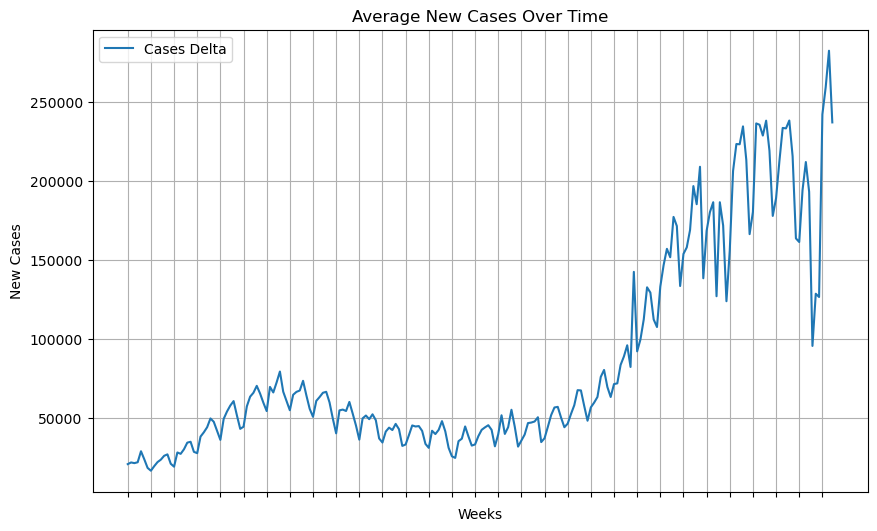

In [38]:
# Assuming cases_delta_array is your NumPy array containing the data

# Create an array for the x-axis
x = np.arange(cases_delta_array.shape[1])

# Plot the data as a line chart
plt.figure(figsize=(10, 6))
plt.plot(x, cases_delta_array[0, :], label='Cases Delta', marker='', linestyle='-')

plt.xlabel('Weeks')
plt.ylabel('New Cases')
plt.title('Average New Cases Over Time')
plt.legend()

plt.grid(True)

# Set custom x-axis ticks every 7 days without labels
x_ticks = np.arange(0, cases_delta_array.shape[1], 7)
plt.xticks(x_ticks, [])
plt.show()

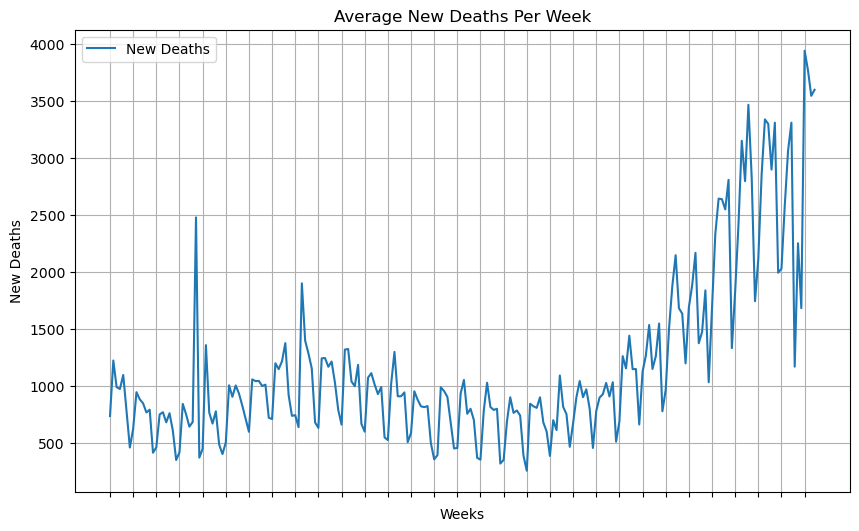

In [39]:
# Create an array for the x-axis
x = np.arange(deaths_delta_array.shape[1])

# Plot the data as a line chart
plt.figure(figsize=(10, 6))
plt.plot(x, deaths_delta_array[0, :], label='New Deaths', marker='', linestyle='-')

plt.xlabel('Weeks')
plt.ylabel('New Deaths')
plt.title('Average New Deaths Per Week')
plt.legend()


plt.grid(True)

x_ticks = np.arange(0, cases_delta_array.shape[1], 7)
plt.xticks(x_ticks, [])
plt.show()

In [40]:
# Calculate the number of elements and the number of 7-element groups
num_elements = cases_delta_array.shape[1]
num_groups = num_elements // 7

# Initialize arrays to store the results
cases_means = np.empty(num_groups)
cases_medians = np.empty(num_groups)
cases_modes = np.empty(num_groups)

# Calculate statistics for each 7-element group
for i in range(num_groups):
    start_index = i * 7
    end_index = start_index + 7
    group_data = cases_delta_array[0, start_index:end_index]

    # Calculate mean
    cases_means[i] = np.mean(group_data)

    # Calculate median
    cases_medians[i] = np.median(group_data)

    # Calculate mode (using stats.mode)
    mode_result = stats.mode(group_data)
    cases_modes[i] = mode_result.mode[0]

# Now, 'means', 'medians', and 'modes' contain the statistics for each 7-element group

C:\Users\Billy\AppData\Local\Temp\ipykernel_22048\149670414.py:23: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



In [41]:
# Calculate the number of elements and the number of 7-element groups
num_elements = deaths_delta_array.shape[1]
num_groups = num_elements // 7

# Initialize arrays to store the results
deaths_means = np.empty(num_groups)
deaths_medians = np.empty(num_groups)
deaths_modes = np.empty(num_groups)

# Calculate statistics for each 7-element group
for i in range(num_groups):
    start_index = i * 7
    end_index = start_index + 7
    group_data = deaths_delta_array[0, start_index:end_index]

    # Calculate mean
    deaths_means[i] = np.mean(group_data)

    # Calculate median
    deaths_medians[i] = np.median(group_data)

    # Calculate mode (using stats.mode)
    mode_result = stats.mode(group_data)
    deaths_modes[i] = mode_result.mode[0]

# Now, 'deaths_means', 'deaths_medians', and 'deaths_modes' contain the statistics for each 7-element group for deaths data.


C:\Users\Billy\AppData\Local\Temp\ipykernel_22048\2466669137.py:28: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



In [43]:
print(cases_means)

print(cases_medians)

print(cases_modes)

print(deaths_means)

print(deaths_medians)

print(deaths_modes)

[ 22407.42857143  22213.          28906.42857143  41406.71428571
  50360.          60902.42857143  67014.85714286  63811.85714286
  59481.14285714  51797.          46329.85714286  40450.42857143
  40301.85714286  39366.85714286  33963.57142857  39697.85714286
  43798.28571429  43098.71428571  48710.71428571  56793.
  66944.71428571  90885.14285714 112259.28571429 152914.57142857
 172823.85714286 163445.14285714 203238.42857143 216544.28571429
 212193.28571429 158710.        ]
[ 21795.  22023.  28505.  41884.  51573.  63439.  66574.  64615.  60756.
  54366.  49176.  42300.  41767.  41460.  35269.  42427.  44104.  46712.
  50182.  57534.  63244.  83523. 112270. 151650. 168939. 171750. 213214.
 228669. 215592. 161286.]
[ 18348.  16564.  19118.  27668.  36081.  44394.  54306.  54835.  49528.
  40209.  36209.  32267.  33164.  31036.  24677.  32004.  31825.  34687.
  37091.  46362.  56674.  71382.  92122. 133059. 138358. 123827. 155954.
 177815. 163603.  95538.]
[ 892.85714286  751.71428571 

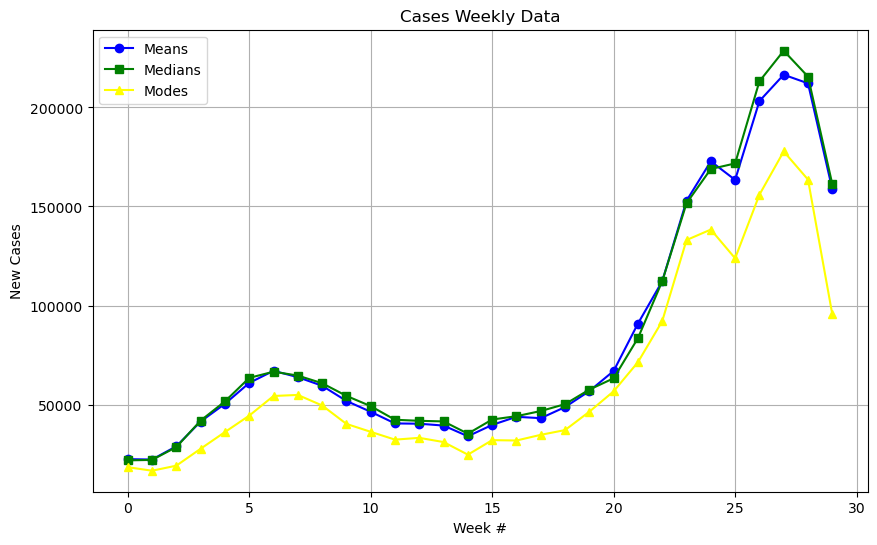

In [51]:
x = np.arange(len(cases_means))  # Adjust this if your x-axis is different

# Plot the data for cases
plt.figure(figsize=(10, 6))
plt.plot(x, cases_means, label='Means', color='blue', marker='o', linestyle='-')
plt.plot(x, cases_medians, label='Medians', color='green', marker='s', linestyle='-')
plt.plot(x, cases_modes, label='Modes', color='yellow', marker='^', linestyle='-')

plt.xlabel('Week #')
plt.ylabel('New Cases')
plt.title('Cases Weekly Data')
plt.legend()

plt.grid(True)
plt.show()

This smooths out our case data abit, and we can make some observations. The mode is consistently lower than the rest, implying that the data trend towards negative skewness. Aside from a few turbulent weeks, the mean and median follow one another rather closely however. This suggests that the number of cases is roughly symmetrical, aside from the fact that lower numbers are more likely to appear more often.

You can see that there are jumps in cases around week 6, and a big peak at week 27.

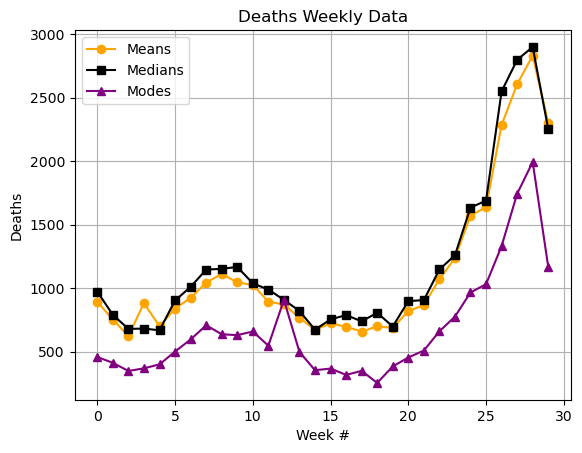

In [53]:
x = np.arange(len(cases_means))  # Adjust this if your x-axis is different

# Plot the data for deaths
plt.plot(x, deaths_means, label='Means', color='orange', marker='o', linestyle='-')
plt.plot(x, deaths_medians, label='Medians', color='black', marker='s', linestyle='-')
plt.plot(x, deaths_modes, label='Modes', color='purple', marker='^', linestyle='-')

plt.xlabel('Week #')
plt.ylabel('Deaths')
plt.title('Deaths Weekly Data')
plt.legend()

plt.grid(True)
plt.show()

The deaths trend follows the same rough trajectory of the cases, but the values are thankfully much lower. The modes, again, are usually lower than the mean and median, which suggests a tendency for the most common value to be lower.

The peaks seen in the cases at week 6 and 27 are present in the deaths data as well.